# CRICKET PLAYER PERFORMANCE PREDICTION

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import kaggle
import zipfile36 as zipfile

import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d saivamshi/cricket-world-cup-2019-players-data


  0%|          | 0.00/395k [00:00<?, ?B/s]
100%|##########| 395k/395k [00:07<00:00, 51.4kB/s]
100%|##########| 395k/395k [00:07<00:00, 51.4kB/s]


In [3]:
zipfile_name = 'cricket-world-cup-2019-players-data.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
df = pd.read_csv('Batsman_Data.csv')

In [5]:
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [6]:
df.tail()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048
11148,11149,TDNB,-,-,-,-,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Gulbadin Naib,352048


In [7]:
df.shape

(11149, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [9]:
df.describe()

,Unnamed: 0,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


In [10]:
df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [11]:
df['Ground'].nunique()

134

In [12]:
df['Ground'].value_counts()

Ground
Dhaka               839
Harare              372
Sharjah             354
Abu Dhabi           319
Colombo (RPS)       317
                   ... 
Vijayawada            1
Hyderabad (Sind)      1
Tangier               1
Georgetown            1
Jodhpur               1
Name: count, Length: 134, dtype: int64

In [13]:
df['Batsman'].nunique()

149

In [14]:
df['Batsman'].value_counts()

Batsman
MS Dhoni            341
Chris Gayle         289
Shoaib Malik        284
Virat Kohli         227
Eoin Morgan         222
                   ... 
Mohammad Hasnain      5
Anrich Nortje         4
Abid Ali              3
Abu Jayed             2
Nicholas Pooran       1
Name: count, Length: 149, dtype: int64

In [15]:
df['Opposition'].nunique()

22

In [16]:
df['Opposition'].unique()

array(['v India', 'v Bangladesh', 'v England', 'v Australia',
       'v Pakistan', 'v South Africa', 'v Afghanistan', 'v Ireland',
       'v New Zealand', 'v West Indies', 'v Zimbabwe', 'v U.A.E.',
       'v Sri Lanka', 'v Bermuda', 'v Canada', 'v Netherlands',
       'v Scotland', 'v P.N.G.', 'v Kenya', 'v Asia XI', 'v Hong Kong',
       'v Africa XI'], dtype=object)

In [17]:
df['Opposition'].value_counts()

Opposition
v Sri Lanka       1283
v India           1187
v Australia       1169
v England         1077
v Pakistan        1072
v New Zealand      992
v West Indies      918
v South Africa     888
v Zimbabwe         860
v Bangladesh       639
v Ireland          450
v Scotland         169
v Afghanistan      139
v Kenya             67
v U.A.E.            65
v Netherlands       63
v Canada            52
v Hong Kong         34
v Bermuda           11
v P.N.G.             6
v Africa XI          5
v Asia XI            3
Name: count, dtype: int64

In [18]:
df.drop(df[df['Bat1'] == 'DNB'].index, inplace=True)
df.drop(df[df['Bat1'] == 'TDNB'].index, inplace=True)
df.drop(df[df['Bat1'] == 'absent'].index, inplace=True)
df.drop(df[df['Bat1'] == 'sub'].index, inplace=True)

In [19]:
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [20]:
df['Bat1'] = df['Bat1'].str.replace('*', '.')
df['Runs'] = df['Runs'].str.replace('-', '0')
df['BF'] = df['BF'].str.replace('-', ' 0')
df['SR'] = df['SR'].str.replace('-', '0')
df['4s'] = df['4s'].str.replace('-', '0')
df['6s'] = df['6s'].str.replace('-', '0')

In [21]:
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [22]:
df['Runs'] = df['Runs'].astype(float)
df['BF'] = df['BF'].astype(float)
df['SR'] = df['SR'].astype(float)
df['4s'] = df['4s'].astype(float)
df['6s'] = df['6s'].astype(float)

In [23]:
df.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF            float64
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

# Label Encoding:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()

In [26]:
df['Opposition'] = label.fit_transform(df['Opposition'])
df['Ground'] = label.fit_transform(df['Ground'])
df['Start Date'] = label.fit_transform(df['Start Date'])
df['Match_ID'] = label.fit_transform(df['Match_ID'])
df['Batsman'] = label.fit_transform(df['Batsman'])

In [27]:
df

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0.0,8.0,0.00,0.0,0.0,9,38,68,718,112,49619
6,7,0.,0.0,0.0,0.00,0.0,0.0,7,125,1066,906,112,49619
9,10,1.,1.0,3.0,33.33,0.0,0.0,7,100,1392,909,112,49619
10,11,0.,0.0,2.0,0.00,0.0,0.0,3,102,52,914,112,49619
11,12,0,0.0,2.0,0.00,0.0,0.0,15,40,138,947,112,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11142,11143,0.,0.0,2.0,0.00,0.0,0.0,4,1,827,1695,41,352048
11143,11144,15,15.0,46.0,32.60,1.0,0.0,9,40,929,1696,41,352048
11144,11145,46,46.0,61.0,75.40,6.0,1.0,10,36,1048,1746,41,352048
11145,11146,3,3.0,6.0,50.00,0.0,0.0,10,36,604,1747,41,352048


In [28]:
df.corr()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
Unnamed: 0,1.000000,0.019036,0.019036,0.024119,0.008995,0.020184,-0.004578,0.142381,-0.049110,-0.009664,0.097250,0.209071,0.018165
Bat1,0.019036,1.000000,1.000000,0.931729,0.362068,0.892554,0.628764,0.033629,0.013681,-0.003691,0.029822,0.024578,-0.088907
Runs,0.019036,1.000000,1.000000,0.931729,0.362068,0.892554,0.628764,0.033629,0.013681,-0.003691,0.029822,0.024578,-0.088907
BF,0.024119,0.931729,0.931729,1.000000,0.171519,0.797274,0.458867,0.033318,0.008504,-0.002371,-0.014462,0.042272,-0.112266
SR,0.008995,0.362068,0.362068,0.171519,1.000000,0.368566,0.389540,0.024980,0.011006,-0.004133,0.077703,-0.025706,0.020345
4s,0.020184,0.892554,0.892554,0.797274,0.368566,1.000000,0.437912,0.031422,0.022742,-0.006679,0.020744,0.021678,-0.080112
6s,-0.004578,0.628764,0.628764,0.458867,0.389540,0.437912,1.000000,0.014547,0.012355,0.010890,0.063815,-0.045450,-0.024252
Opposition,0.142381,0.033629,0.033629,0.033318,0.024980,0.031422,0.014547,1.000000,-0.038221,0.024096,-0.046512,0.064038,-0.038733
Ground,-0.049110,0.013681,0.013681,0.008504,0.011006,0.022742,0.012355,-0.038221,1.000000,0.043650,0.000808,-0.040756,-0.001828
Start Date,-0.009664,-0.003691,-0.003691,-0.002371,-0.004133,-0.006679,0.010890,0.024096,0.043650,1.000000,0.001152,0.001848,0.018398


<Axes: >

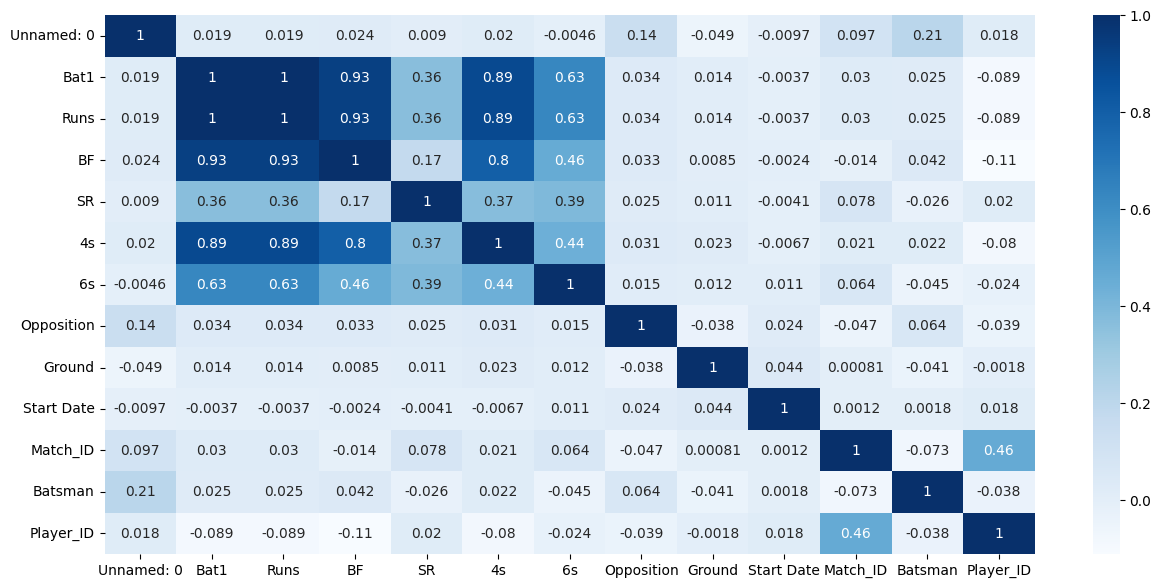

In [29]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Train and Test split:

In [30]:
X = df.drop(columns=['Runs'], axis=1)
Y = df['Runs']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [33]:
X_train.shape

(6242, 12)

In [34]:
Y_train.shape

(6242,)

In [35]:
X_test.shape

(2676, 12)

In [36]:
X_test.shape

(2676, 12)

# Model Training:

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [39]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

# Model Prediction:

In [40]:
yPred = model.predict(X_test)

# Model Evaluation:

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print('Model Accuracy : {0:0.4f}'.format(accuracy_score(Y_test, yPred)))

Model Accuracy : 0.7907


In [43]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [44]:
feature_scores

Bat1          0.367934
SR            0.128989
BF            0.099109
Start Date    0.055476
Unnamed: 0    0.054142
Match_ID      0.053625
Ground        0.050194
Player_ID     0.045734
Batsman       0.044370
4s            0.043849
Opposition    0.039913
6s            0.016666
dtype: float64

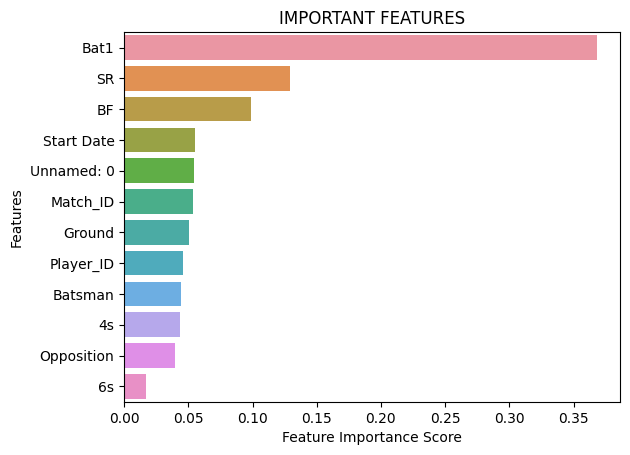

In [45]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.title('IMPORTANT FEATURES')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()